# 비지도 학습
## 8.2 K-평균 알고리즘

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [2]:
x,y = make_circles(n_samples=500, noise=0.1)

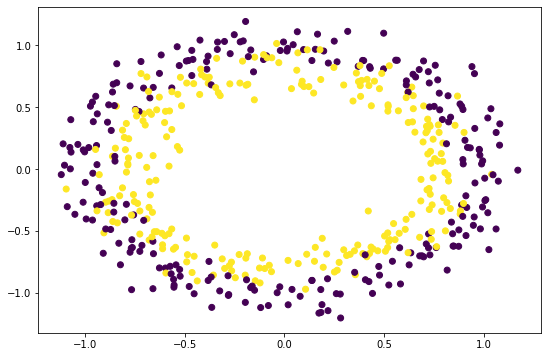

In [3]:
plt.figure(figsize=(9,6))
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [4]:
x = torch.FloatTensor(x)
print(x.size())

torch.Size([500, 2])


In [5]:
def l2distance(a, b):    
    return torch.argmin(torch.sum((a-b)**2,dim=1),dim=0)


def kmeans(x, num_clusters=2, max_iteration = 30):
    
    centroids = torch.rand(num_clusters, x.size(1))
    
    for update in range(max_iteration):
        y_assign = []
        for m in range(x.size(0)):
            h = x[m].expand(num_clusters,-1)
            assign = l2distance(h, centroids)
            y_assign.append(assign.item())

        y_assign = np.array(y_assign)
        if update != max_iteration-1:
            for i in range(num_clusters):
                idx = np.where(y_assign == i)[0]
                if len(idx) == 0:
                    centroids[i] = torch.rand(x.size(1))
                else:
                    centroids[i] = torch.mean(x[idx], dim=0)
    
    return y_assign, centroids
    

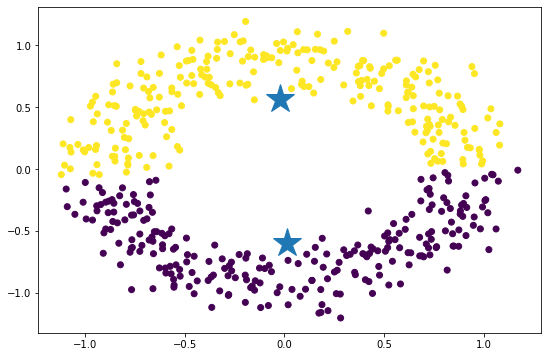

In [6]:
y_pred, centroids = kmeans(x,2)
plt.figure(figsize=(9,6))
plt.scatter(x[:,0], x[:,1], c=y_pred)
plt.plot(centroids[:,0], centroids[:,1], '*', markersize=30)
plt.show()

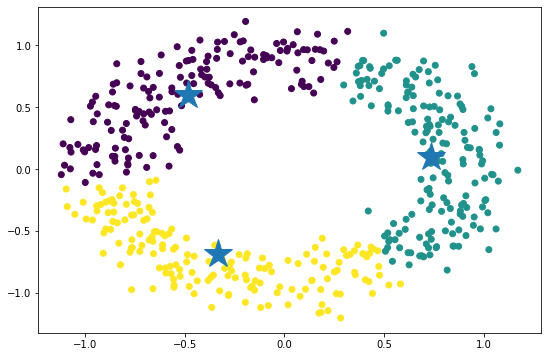

In [7]:
y_pred, centroids = kmeans(x,3)
plt.figure(figsize=(9,6))
plt.scatter(x[:,0], x[:,1], c=y_pred)
plt.plot(centroids[:,0], centroids[:,1], '*', markersize=30)
plt.show()

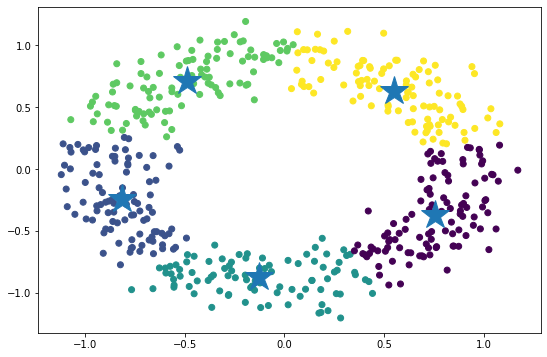

In [8]:
y_pred, centroids = kmeans(x,5)
plt.figure(figsize=(9,6))
plt.scatter(x[:,0], x[:,1], c=y_pred)
plt.plot(centroids[:,0], centroids[:,1], '*', markersize=30)
plt.show()

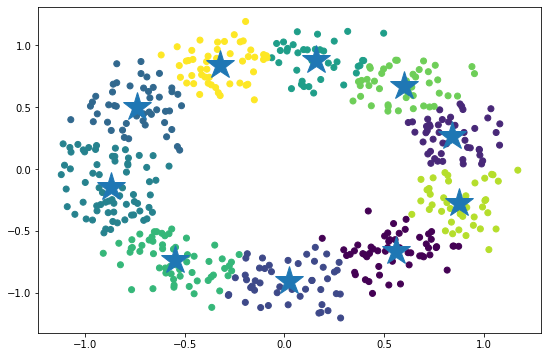

In [9]:
y_pred, centroids = kmeans(x,10)
plt.figure(figsize=(9,6))
plt.scatter(x[:,0], x[:,1], c=y_pred)
plt.plot(centroids[:,0], centroids[:,1], '*', markersize=30)
plt.show()